# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Vincen Imanuel
- **Email:** vincenimanuel13@gmail.com
- **ID Dicoding:** vincenimanuel

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang terjual paling banyak dan paling sedikit? Apakah harga produk berpengaruh pada banyaknya penjualan?
- Bagaimana persebaran lokasi customer dilihat dari letak geografisnya?

## Import Semua Packages/Library yang Digunakan

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import urllib


## 1. Data Wrangling

### 1.1 Gathering Data

In [130]:
customers_data = pd.read_csv("data/customers_dataset.csv")
geolocation_data = pd.read_csv("data/geolocation_dataset.csv")
items_data = pd.read_csv("data/order_items_dataset.csv")
payments_data = pd.read_csv("data/order_payments_dataset.csv")
reviews_data = pd.read_csv("data/order_reviews_dataset.csv")
orders_data = pd.read_csv("data/orders_dataset.csv")
category_data = pd.read_csv("data/product_category_name_translation.csv")
products_data = pd.read_csv("data/products_dataset.csv")
sellers_data = pd.read_csv("data/sellers_dataset.csv")

data = {
    'customers': customers_data,
    'geolocation': geolocation_data,
    'items': items_data,
    'payments': payments_data,
    'reviews': reviews_data,
    'orders': orders_data,
    'category': category_data,
    'products': products_data,
    'sellers': sellers_data
}

Pada tahap ini, saya menggunakan function read_csv() dari pandas untuk membaca berkas CSV.
Kemudian saya ubah ke dalam bentuk dictionary supaya lebih mudah diakses.

In [131]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Fungsi head digunakan untuk mengambil data teratas dari sebuah dataframe (default: 5 baris).

In [132]:
data['geolocation'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Fungsi head digunakan untuk mengambil data teratas dari sebuah dataframe (default: 5 baris).

In [133]:
data['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Fungsi head digunakan untuk mengambil data teratas dari sebuah dataframe (default: 5 baris).

In [134]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Fungsi head digunakan untuk mengambil data teratas dari sebuah dataframe (default: 5 baris).

In [135]:
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Fungsi head digunakan untuk mengambil data teratas dari sebuah dataframe (default: 5 baris).

In [136]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Fungsi head digunakan untuk mengambil data teratas dari sebuah dataframe (default: 5 baris).

In [137]:
data['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Fungsi head digunakan untuk mengambil data teratas dari sebuah dataframe (default: 5 baris).

In [138]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Fungsi head digunakan untuk mengambil data teratas dari sebuah dataframe (default: 5 baris).

In [139]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Fungsi head digunakan untuk mengambil data teratas dari sebuah dataframe (default: 5 baris).

**Insight:**
- Menggunakan function read_csv() dari pandas untuk membaca berkas CSV.
- Kemudian diubah ke dalam bentuk dictionary supaya lebih mudah diakses.
- Berdasarkan pengamatan dari head data, semua data CSV memiliki atribut dan value yang sudah tepat.

### 1.2 Assessing Data

Karena semua data diubah ke dalam bentuk dictionary, maka dapat digunakan looping untuk mengakses setiap DataFrame.

In [140]:
for df_name in data.keys():
    print(f'{df_name} \n {data[df_name].info()} \n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
customers 
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city            

Saya gunakan perulangan untuk mengakses dictionary berisi dataframe yang sudah saya buat sebelumnya di tahap Data Gathering.
Untuk setiap dataframe, saya print informasi menggunakan fungsi info() dari setiap dataframe yang ada di dictionary menggunakan konsep tipe data dictionary. 

#### 1.2.1 Apakah terdapat Missing Value pada DataFrame?

In [141]:
for df_name in data.keys():
    print(f'Data null {df_name}:\n{data[df_name].isnull().sum()}\n')

Data null customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Data null geolocation:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Data null items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Data null payments:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Data null reviews:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp   

Untuk pengecekan missing value (data bernilai none), dengan perulangan, setiap dataframe di dictionary diambil dan dihitung data yang kosong menggunakan fungsi isnull() dan dijumlahkan dengan fungsi sum().

#### 1.2.2 Apakah ada Duplicate Data pada DataFrame?

In [142]:
data['geolocation'].duplicated().sum()

261831

Saya melakukan pengecekan jumlah data duplikat yang ada di dataframe menggunakan fungsi duplicated() dan totalnya menggunakan fungsi sum(). Di atas ini adalah contoh penggunaannya.

In [143]:
for df_name in data.keys():
    print(f'Data duplikat {df_name}: {data[df_name].duplicated().sum()}\n')

Data duplikat customers: 0

Data duplikat geolocation: 261831

Data duplikat items: 0

Data duplikat payments: 0

Data duplikat reviews: 0

Data duplikat orders: 0

Data duplikat category: 0

Data duplikat products: 0

Data duplikat sellers: 0



Saya gunakan perulangan untuk melakukan pengecekan data duplikat pada setiap dataframe menggunakan fungsi duplicated() dan dijumlahkan dengan fungsi sum(). Dan ada satu dataframe yang memiliki data duplikat.

Dari hasil perhitungannya, terdapat 261831 data duplikat pada DataFrame geolocation.

#### 1.2.3 Apakah ada Invalid Value dari DataFrame?

In [144]:
for df_name in data.keys():
    print(f'Describe data {df_name}:\n{data[df_name].describe(include='all')}\n')

Describe data customers:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix custo

- Sebuah DataFrame dinyatakan tidak memiliki Invalid Value ketika setiap data yang ada bersifat unik dan isinya masuk akal.
- Berdasarkan pengamatan, ada DataFrame yang setiap isinya memiliki ID dan isinya masuk akal.
- Dengan describe, beberapa DataFrame seperti customers, orders dan products sudah memiliki ID yang unik untuk setiap datanya.
- Maka bisa disimpulkan bahwa pada DataFrame tersebut tidak memiliki Invalid Value.
- Describe() adalah fungsi untuk mendeskripsikan beberapa informasi penting mengenai sebuah dataframe, parameternya menggunakan include='all' untuk menampilkan seluruh informasi mengenai sebuah dataframe.

#### **Insight:**
- Terdapat missing values dari dataframe:
  - reviews (kolom review_comment_title dan review_comment_message)
  - orders (kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date)
  - products (product_category_name, product_name_lenght, product_description_lenght, product_photos_qty)

- Terdapat 261831 data duplikat pada DataFrame geolocation.


### 1.3 Cleaning Data

#### 1.3.1 Duplicate Data

Data duplikat hanya terdapat di DataFrame geolocation.

In [145]:
data['geolocation'].drop_duplicates(inplace=True)

Untuk melakukan penghapusan data yang duplikat, saya gunakan fungsi drop_duplicates() dan parameter inplace=True. Parameter inplace=True akan mengubah dataframe secara langsung.

Kode di atas akan menghapus data duplikat dari DataFrame geolocation.

In [146]:
data['geolocation'].duplicated().sum()

0

Setelah saya cek lagi, sudah tidak ada data duplikat pada dataframe 'geolocation'. Data duplikat telah terhapus, ditunjukkan dengan total data duplikat yang sudah bernilai 0.

#### 1.3.2 Missing Values

##### Kolom Orders

Data null orders:
- order_approved_at                 160
- order_delivered_carrier_date     1783
- order_delivered_customer_date    2965

Ketiga kolom tersebut apabila didrop maka tidak akan jadi masalah karena berdasarkan pengamatan, saya hanya akan menggunakan baris data yang lengkap saja dan sudah ter-delivery.

In [147]:
data['orders'].dropna(axis= 0, inplace= True)

Dari DataFrame orders saya hapus data yang kosong dengan fungsi isna() dengan parameter axis=0.
Dengan parameter axis=0, maka yang terhapus adalah baris yang memiliki setidaknya satu data Nan.
Mengapa saya hapus barisnya? Karena saya mengamati bahwa jika saya menghapus kolom, maka semua baris akan terpengaruhi. Inplace=true karena saya ingin mengubah dataframe secara langsung.

In [148]:
data['orders'].isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Sudah tidak ada data kosong setelah dicek dengan menggunakan fungsi isna() dan sum().

##### Kolom Products

Data null products:
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2

Saya drop baris yang memiliki nilai kosong, karena jumlah baris yang memiliki nilai kosong terbilang sedikit dan data kosong tidak terdapat banyak pada salah satu atau suatu data tertentu.

In [149]:
data['products'].dropna(axis= 0, inplace= True)

Untuk menghapus data yang kosong, saya gunakan fungsi dropna() dengan parameter axis=0 dan inplace = true. Menggunakan parameter axis=0 karena saya ingin menghapus baris bukan kolom (axis=1), inplace=true karena saya ingin mengubah dataframe secara langsung.

In [150]:
data['products'].isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Sudah tidak ada data kodong

##### Kolom Reviews

Data null reviews:
- review_comment_title       87656
- review_comment_message     58247

Dari 99224 data, ada 87656 dan 58247 data kosong. Itu sangat banyak, sehingga saya akan drop kolom tersebut saja dan tetap mempertahankan data dengan kolom yang lain.

In [151]:
data['reviews'].drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)

Saya melakukan drop kolom menggunakan fungsi drop() dan parameter columns berisi list dari nama kolom yang akan dihapus. Inplace = True untuk mengubah dataframe secara langsung.

In [152]:
data['reviews'].isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Kolom sudah terhapus dan sudah tidak ada data kosong.

#### **Insights**
- Data duplikat telah di-drop dengan menggunakan fungsi drop_duplicates dari pandas.
- Missing Values juga telah di-drop menggunakan drop dan axis tergantung pada kondisi drop kolom atau baris. axis=0 untuk baris dan axis=1 untuk kolom.
- Menurut saya, data sudah clean dan bisa dilanjutkan untuk tahap explorasi data.

## 2. Exploratory Data Analysis (EDA)

Pada tahap ini, saya akan menggunakan fungsi describe dengan parameter include='all' dari pandas. Fungsi dan parameter ini bertujuan untuk memberikan informasi statistik dari dataframe yaitu informasi mengenai kolom-kolom yang ada. Dengan menggunakan include='all', artinya fungsi describe akan memberikan deskripsi pada semua jenis kolom, numerik maupun non-numerik. Di sini saya akan mengambil data yang menurut saya penting untuk digunakan dalam menjawab pertanyaa bisnis yang ada.

In [153]:
for df_name, df in data.items():
    print(f'Describe data {df_name}:\n{df.describe(include="all")}\n\n\n')

Describe data customers:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix custo

Pada tahan ini, dalam mendespriksikan data dari setiap dataframe saya menggunakan looping. Dan pada setiap looping, saya mendeskripsikan data menggunakan fungsi describe dan parameternya 

In [154]:
for df_name, df in data.items():
    print(f'Isi data {df_name}:\n{df.head()}\n\n\n')

Isi data customers:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  



Isi data geolocation:
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23

### Merge customers dan orders

Pada tahap ini saya melakukan penggabungan dataframe customers dan orders untuk menggabungkan data yang dimiliki customer dan order apa yang dilakukan berdasarkan customer_id yang dimiliki oleh kedua dataframe, artinya kedua dataframe tersebut memiliki keterkaitan dan dapat digabungkan dengan id customer.

In [155]:
merged_cust_orders_df = pd.merge(
    left=data['customers'],
    right=data['orders'],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
merged_cust_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


Saya menggunakan fungsi merge() dari pandas untuk melakukan merge kedua dataframe.

In [156]:
merged_cust_orders_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)


customer_city
sao paulo                15044
rio de janeiro            6603
belo horizonte            2697
brasilia                  2071
curitiba                  1489
campinas                  1406
porto alegre              1341
salvador                  1188
guarulhos                 1143
sao bernardo do campo      911
Name: order_id, dtype: int64

Saya melakukan pengecekan di kota mana saja dan berapa banyak order yang dilakukan di suatu lokasi tertentu. Dari data terlihat bahwa kota yang memiliki paling banyak customer ada di sao paulo. Karena saya ingin melihat per lokasi, maka saya gunakan groupby by customer_city, per order maka pakai order_id.nuniqe(), nuniqe() supaya datanya unik. Ascending=False untuk menghasilkan data descending(dari terbesar ke terkecil).

In [157]:
data['customers'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_id, dtype: int64

Saya melakukan pengecekan di kota mana saja dan berapa banyak customer di suatu lokasi tertentu. Dari data terlihat bahwa kota yang memiliki paling banyak customer ada di sao paulo. Karena saya ingin melihat per lokasi, maka saya gunakan groupby by customer_city, per order maka pakai order_id.nuniqe(), nuniqe() supaya datanya unik. Ascending=False untuk menghasilkan data descending(dari terbesar ke terkecil).

### Merge payments dan reviews 

In [158]:
merged_payments_reviews_df = pd.merge(
    left=data['payments'],
    right=data['reviews'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
merged_payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,2017-12-21 00:00:00,2017-12-22 01:10:39


Pada tahap ini saya menggabungkan dataframe payments dan reviews sama dengan cara yang saya gunakan dalam melakukan merge data customer dan orders menggunakan order_id.

In [159]:
merged_payments_reviews_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

Saya melakukan pengecekan berapa banyak dan apa saja metode yang digunakan untuk pembayaran tiap order, menggunakan groupby() dan nuniqe().

In [160]:
merged_payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

Terlihat bahwa pembayaran dengan credit card memiliki payment_value yang paling besar.

### Merge merged_cust_orders dan merged_payments_reviews

In [161]:
customers_df = pd.merge(
    left=merged_cust_orders_df,
    right=merged_payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,2018-08-10 00:00:00,2018-08-17 01:59:52


Pada tahap ini, saya melakukan merge pada kedua data hasil merge tadi, saya bertujuan ingin menggabungkan semua data menjadi satu untuk diproses.

### Merge items dan sellers

In [162]:
merged_items_sellers_df = pd.merge(
    left=data['items'],
    right=data['sellers'],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
merged_items_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


Pada tahap ini saya melakukan merge pada data items dan sellers

### Merge products dan category

In [163]:
merged_products_kategory = pd.merge(
    left=data['products'],
    right=data['category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
merged_products_kategory.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


Pada tahap ini saya melakukan merge data products dan category, untuk menggabungkan data produk dengan ketegorinya dan mendapatkan kategori barang dalam bahasa inggris.

### Merge merged_items_sellers_df dan merged_products_kategory

In [164]:
merged_item_sellers= pd.merge(
    left=merged_products_kategory,
    right=merged_items_sellers_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
merged_items_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


Kemudian, pada tahap ini saya melakukan penggabungan antara data hasil merge item dan seller dengan hasil merged data product dan kategory berdasarkan product_id yang dimiliki kedua dataframe hasil merged tersebut.

### Merge Semua Data

In [165]:
main_data = pd.merge(
    left=merged_cust_orders_df,
    right=merged_item_sellers,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
main_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


Pada tahap ini, saya menggabungkan semua hasil merged menjadi satu dataframe berdasarkan order_id. Bisa diambil kesimpulan bahwa order_id adalah id paling utama dan dataframe orders adalah yang mengubungkan antar dataframe.

In [166]:
main_data.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
count,112955,112955,112955.000000,112955,112955,109975,109975,109975,109975,109975,...,108643.000000,108621,108643.000000,108643,108643,108643.000000,108643.000000,108643.000000,108643,108643
unique,99441,96096,NaN,4119,27,96461,2,95939,88272,80100,...,NaN,71,NaN,2914,90128,NaN,NaN,NaN,588,22
top,fc3d1daec319d62d49bfb5e1f83123e9,c8460e4251689ba205045f3ea17884a1,NaN,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16 18:19:25,2018-02-24 03:20:27,2018-05-09 15:48:00,...,NaN,bed_bath_table,NaN,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,NaN,sao paulo,SP
freq,21,24,NaN,17848,47608,21,109968,21,23,48,...,NaN,10952,NaN,1996,21,NaN,NaN,NaN,27156,77484
mean,NaN,NaN,35103.424514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.030467,NaN,1.198632,NaN,NaN,120.085372,19.982591,24525.283700,NaN,NaN
std,NaN,NaN,29860.405168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.696960,NaN,0.708541,NaN,NaN,182.039490,15.733505,27672.334748,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.000000,NaN,1.000000,NaN,NaN,0.850000,0.000000,1001.000000,NaN,NaN
25%,NaN,NaN,11310.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.000000,NaN,1.000000,NaN,NaN,39.900000,13.080000,6429.000000,NaN,NaN
50%,NaN,NaN,24320.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.000000,NaN,1.000000,NaN,NaN,74.900000,16.290000,13660.000000,NaN,NaN
75%,NaN,NaN,59020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,NaN,1.000000,NaN,NaN,134.900000,21.160000,28470.000000,NaN,NaN


In [167]:
main_data.to_csv("./dashboard/main_data.csv", index=False)

Saya simpan dataframe main_data ke dalam bentuk csv untuk digunakan pada dashboard streamlit.

### **Insight**
- Data yang terdapat dalam setiap DataFrame tehubung satu sama lain, menggunakan Primary Key dan Foreign Key. Dihubungkan dengan ID dan kita bisa melakukan pengabungan data berdasarkan itu, iu yang saya lakukan di atas untuk menggabungkan keseluruhan data menjadi satu DataFrame.

## 3. Visualization & Explanatory Analysis

### Pertanyaan 1 : Kategori produk apa yang terjual paling banyak dan paling sedikit? Apakah harga produk berpengaruh pada banyaknya penjualan?

In [168]:
# Lakukan grouping data berdasarkan nama kategori produk dalam bahasa Inggris
# Hitung jumlah produk dengan count() untuk setiap kategori
# Reset index untuk me-return dataframe ke format yang lebih mudah dibaca
total_pembelian_produk = main_data.groupby("product_category_name_english")["product_id"].count().reset_index()

# Ganti nama kolom products_id menjadi products.
total_pembelian_produk = total_pembelian_produk.rename(columns={"product_id": "products"})

# Mengurutkan data berdasarkan jumlah produk dengan urutan Descending.
total_pembelian_produk = total_pembelian_produk.sort_values(by="products", ascending=False)

total_pembelian_produk

,product_category_name_english,products
7,bed_bath_table,10952
43,health_beauty,9467
65,sports_leisure,8429
39,furniture_decor,8156
15,computers_accessories,7643
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,14
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,7


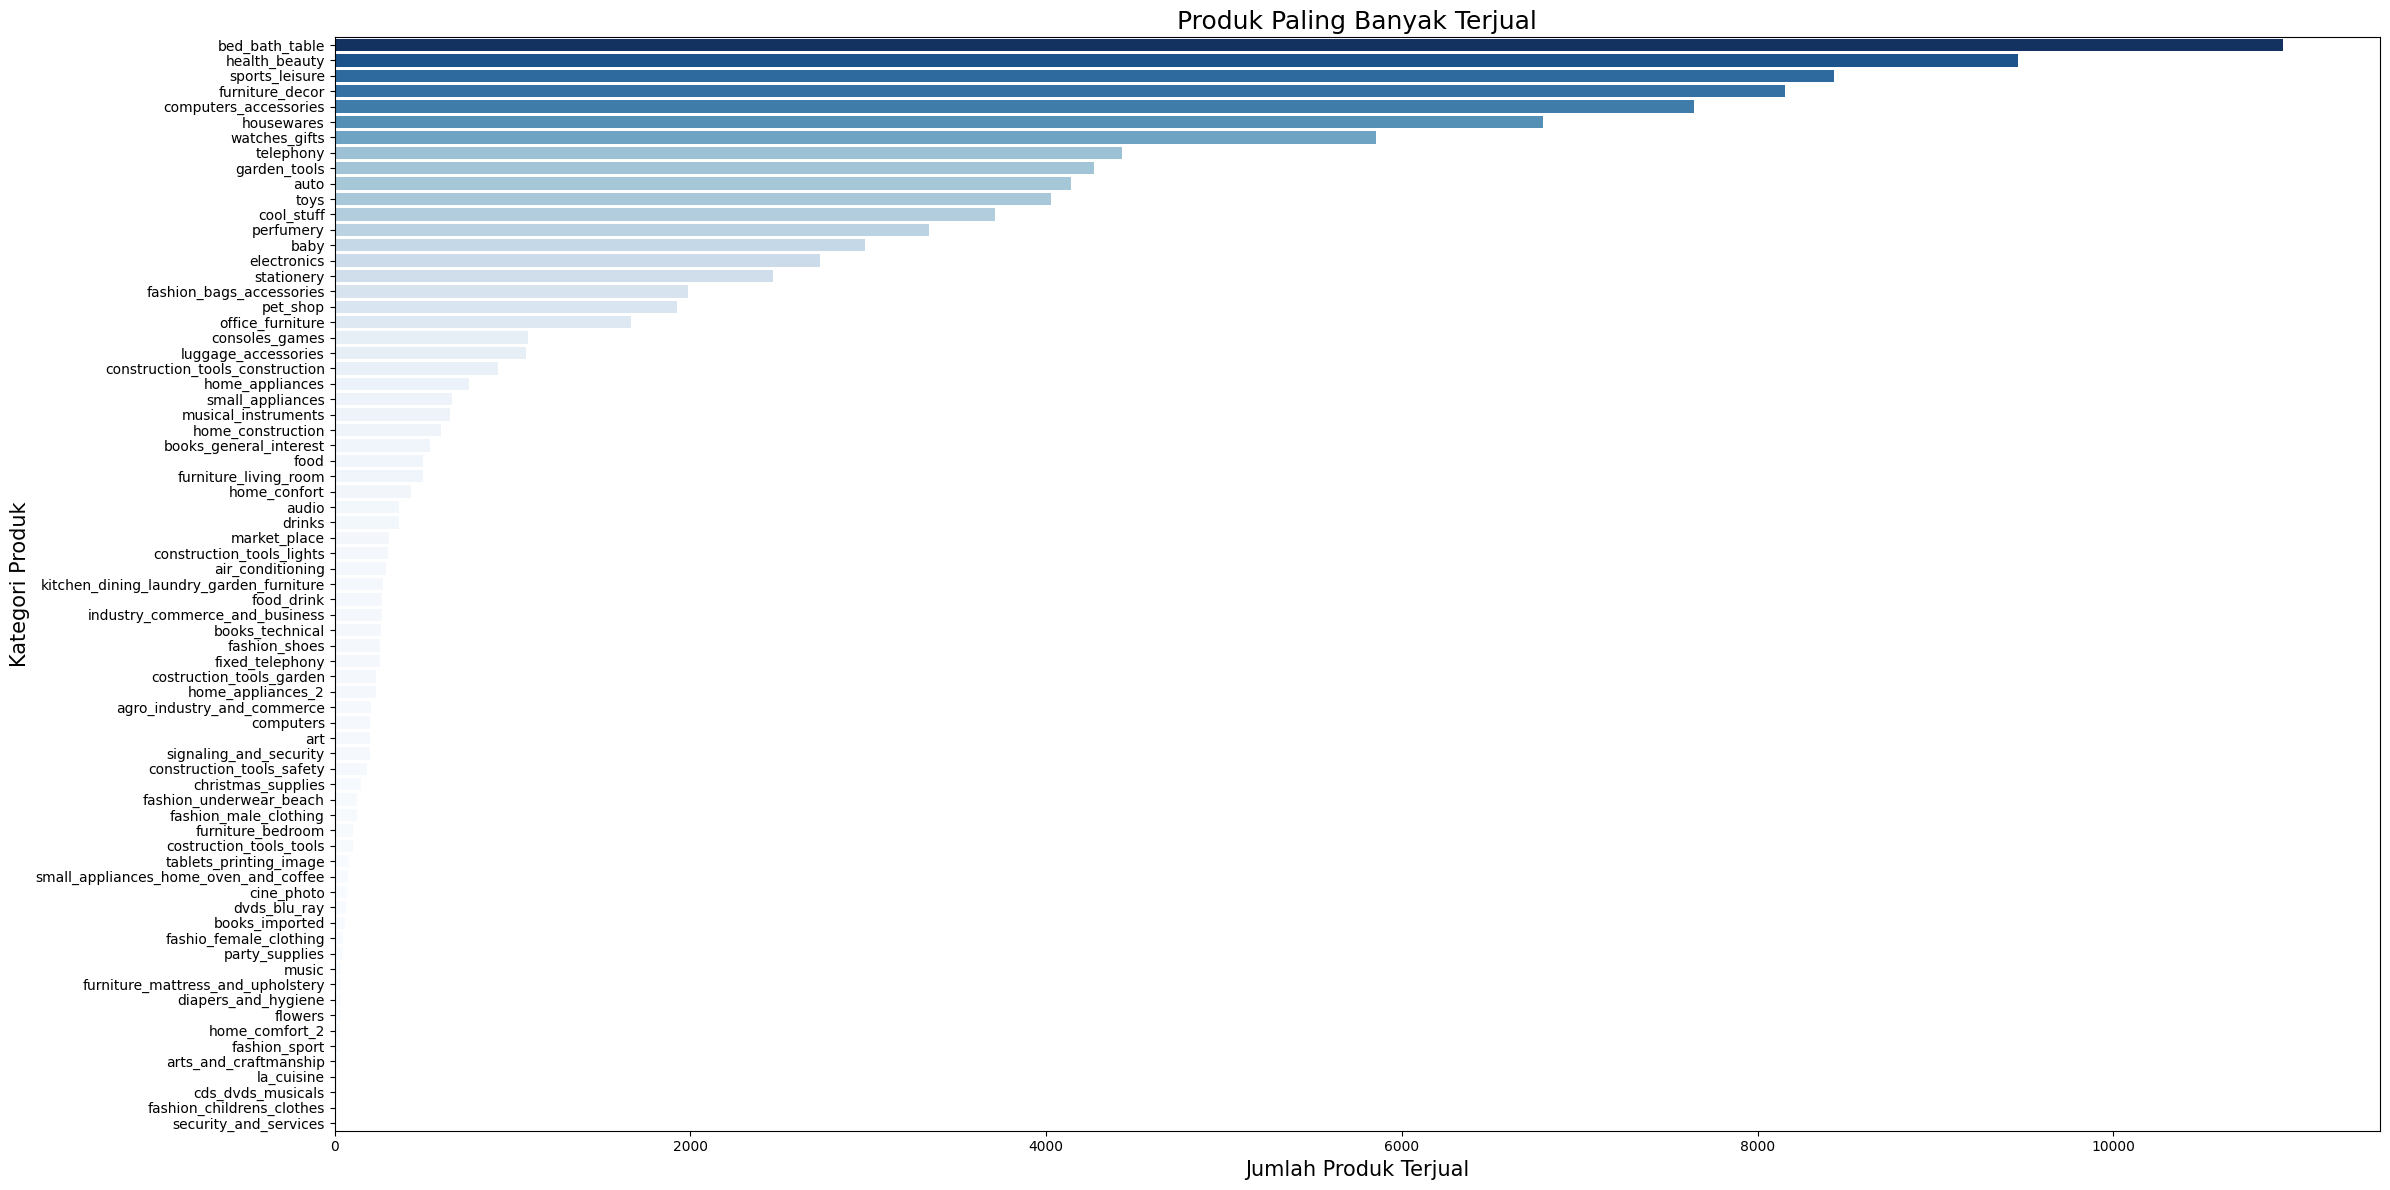

In [169]:
# Mengatur ukuran figure plot
plt.figure(figsize=(24, 12))

# Menghitung warna berdasarkan jumlah produk
norm = plt.Normalize(total_pembelian_produk['products'].min(), total_pembelian_produk['products'].max())
cmap = plt.get_cmap('Blues')  # Mengambil colormap biru

# Mendapatkan warna berdasarkan jumlah produk
colors = cmap(norm(total_pembelian_produk['products']))  # Mendapatkan warna
colors = colors[:, :3].tolist()  # Mengambil RGB dan mengonversi ke list

# Membuat bar plot menggunakan seaborn
# Menambahkan `hue` untuk mengikuti rekomendasi
sns.barplot(x="products", y="product_category_name_english", 
            data=total_pembelian_produk, palette=colors, hue='product_category_name_english', legend=False)

# Membuat label sumbu x dan y
plt.gca().set_xlabel("Jumlah Produk Terjual", fontsize=15)
plt.gca().set_ylabel("Kategori Produk", fontsize=15)

# Mengatur judul
plt.gca().set_title("Produk Paling Banyak Terjual", loc="center", fontsize=18)

plt.tight_layout()
plt.show()

Untuk visualisasi di atas sangatlah sulit untuk dibaca dan tidak jelas. Untuk mengatasinya saya lakukan pembatasan seperti pada di bawah ini.

#### Kategori produk yang terjual paling banyak

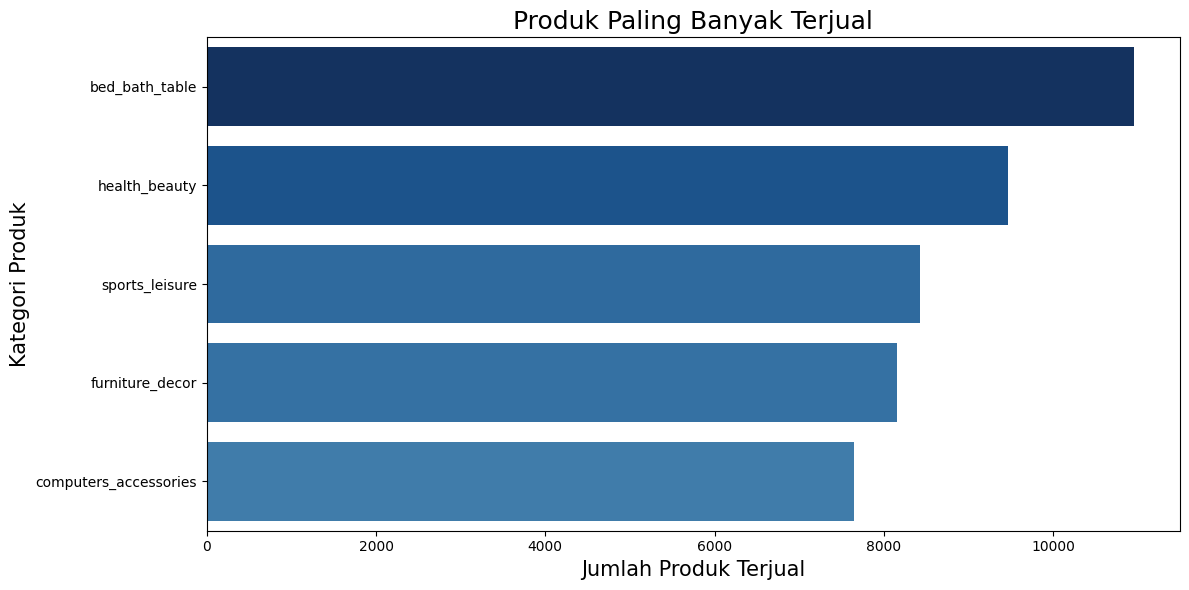

In [170]:
# Mengatur ukuran figure plot
plt.figure(figsize=(12, 6))

# Menghitung warna berdasarkan jumlah produk
norm = plt.Normalize(total_pembelian_produk['products'].min(), total_pembelian_produk['products'].max())
cmap = plt.get_cmap('Blues')  # Mengambil colormap biru

# Mendapatkan warna berdasarkan jumlah produk
colors = cmap(norm(total_pembelian_produk['products'].head(5)))  # Mendapatkan warna
colors = colors[:, :3].tolist()  # Mengambil RGB dan mengonversi ke list

# Membuat bar plot menggunakan seaborn
# Menambahkan `hue` untuk mengikuti rekomendasi
sns.barplot(x="products", y="product_category_name_english", 
            data=total_pembelian_produk.head(5), palette=colors, hue='product_category_name_english', legend=False)

# Membuat label sumbu x dan y
plt.gca().set_xlabel("Jumlah Produk Terjual", fontsize=15)
plt.gca().set_ylabel("Kategori Produk", fontsize=15)

# Mengatur judul
plt.gca().set_title("Produk Paling Banyak Terjual", loc="center", fontsize=18)

plt.tight_layout()
plt.show()

#### Kategori produk yang terjual paling sedikit

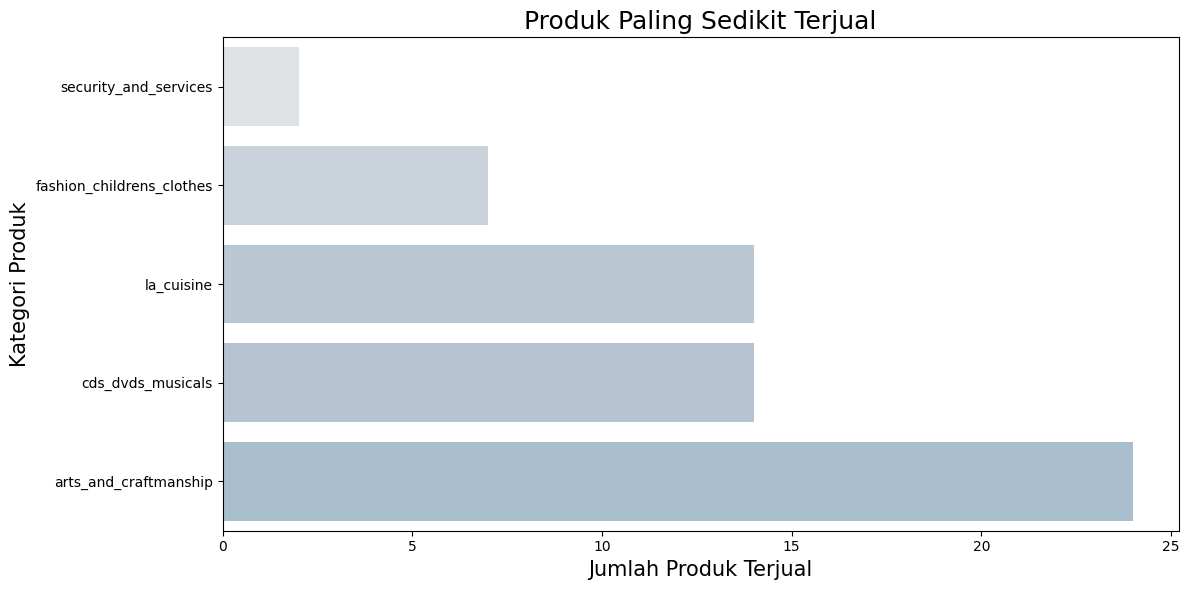

In [171]:
# Mengatur ukuran figure plot
plt.figure(figsize=(12, 6))

# Menghitung warna berdasarkan jumlah produk
norm = plt.Normalize(total_pembelian_produk['products'].min(), total_pembelian_produk['products'].max())
cmap = plt.get_cmap('Blues_r')  # Mengambil colormap biru terbalik

# Mendapatkan warna berdasarkan jumlah produk
colors = cmap(norm(total_pembelian_produk['products'].head(5)))  # Mendapatkan warna
colors = (colors[:, :3] * 0.9).tolist()  # Meningkatkan saturasi dan mengonversi ke list

# Membuat bar plot menggunakan seaborn, Ascending=True untuk menampilkan jumlah penjualan secara ascending (dari terkecil).
# Menggunakan `hue` untuk warna
sns.barplot(x="products", y="product_category_name_english", 
            data=total_pembelian_produk.sort_values(by="products", ascending=True).head(5), 
            palette=colors, hue='product_category_name_english', legend=False)

# Membuat label sumbu x dan y
plt.gca().set_xlabel("Jumlah Produk Terjual", fontsize=15)
plt.gca().set_ylabel("Kategori Produk", fontsize=15)

# Mengatur judul
plt.gca().set_title("Produk Paling Sedikit Terjual", loc="center", fontsize=18)

plt.tight_layout()
plt.show()

#### Apakah harga barang berpengaruh pada jumlah penjualan?

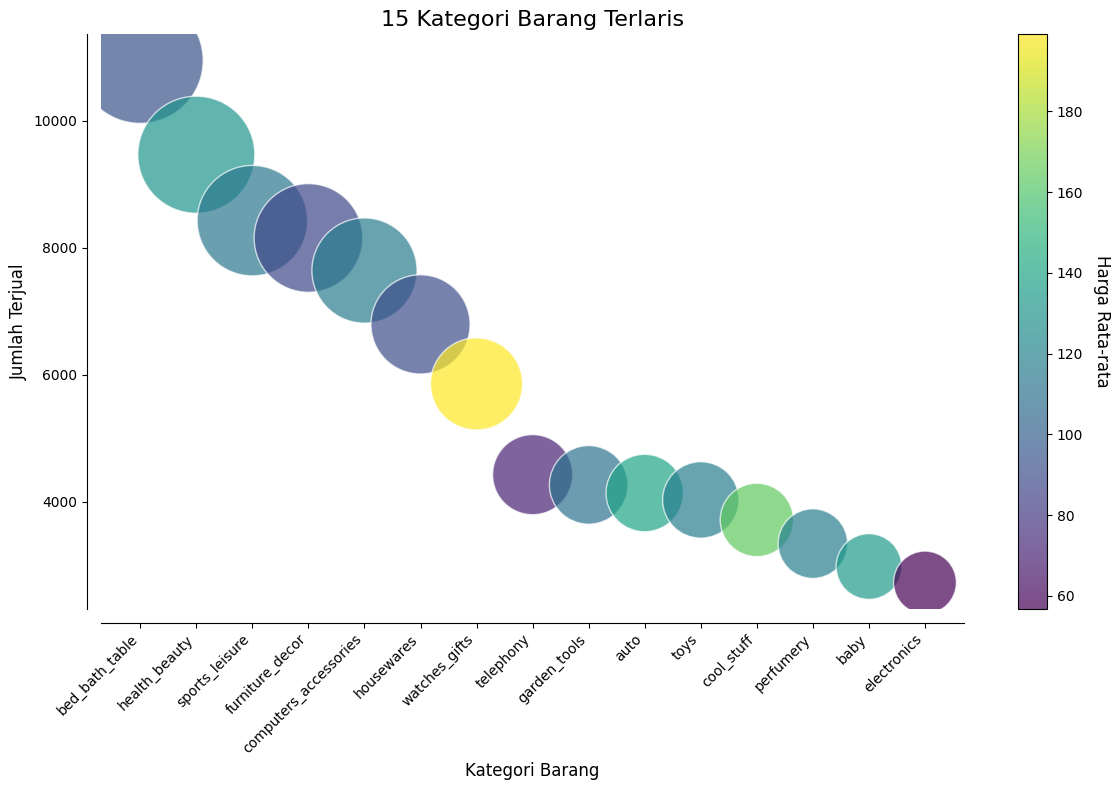

In [172]:
# Hitung jumlah terjual per kategori barang
category_sales = main_data.groupby('product_category_name_english')['order_item_id'].count().reset_index()
category_sales = category_sales.rename(columns={'order_item_id': 'total_sold'})

# Menghitung harga rata-rata per kategori  barang
average_price = main_data.groupby('product_category_name_english')['price'].mean().reset_index()

# Merge data total sold dan average price
combined_data = category_sales.merge(average_price, on='product_category_name_english')

top_15_categories = combined_data.nlargest(15, 'total_sold')

# Fungsi ini untuk menampilkan garis tepi / spines pada plot
def custom_plot(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10)) # Spines bottom dan left dipindahkan ke luar
        else:
            spine.set_color('none') # Spines yang tidak ditentukan dihilangkan
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
custom_plot(ax, ['bottom', 'left'])

# Membuat scatter plot, dengan harga rata-rata yang berwarna
# s: Ukuran titik berdasarkan total terjual, c: Warna berdasarkan harga rata-rata
hb = ax.scatter(x=top_15_categories['product_category_name_english'],  # Sumbu x: Kategori barang
                 y=top_15_categories['total_sold'],                  # Sumbu y: Jumlah terjual
                 c=top_15_categories['price'],                      # Warna titik: Harga rata-rata
                 cmap='viridis',                                     # Menggunakan colormap 'viridis'
                 s=top_15_categories['total_sold'] * 0.75,         # Ukuran titik berdasarkan jumlah terjual
                 alpha=0.7,                                         # Transparansi titik
                 edgecolor='w')                                     # Warna tepi titik

# Mengatur tampilan ticks sumbu x
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x 45 derajat agar mudah dibaca
plt.title('15 Kategori Barang Terlaris', fontsize=16)  # Judul plot
plt.xlabel('Kategori Barang', fontsize=12)  # Label sumbu x
plt.ylabel('Jumlah Terjual', fontsize=12)    # Label sumbu y

# Menambahkan colorbar untuk menunjukkan harga rata-rata
cbar = plt.colorbar(hb, ax=ax)
cbar.set_label('Harga Rata-rata', rotation=270, labelpad=20, fontsize=12)

plt.tight_layout()

plt.show()


### Pertanyaan 2: Bagaimana persebaran lokasi customer dilihat dari letak geografisnya?

In [173]:
# Menghitung jumlah negara bagian unik berdasarkan prefix kode pos
other_state_geolocation = data['geolocation'].groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')

# Mengambil hanya kode pos yang memiliki 2 atau lebih negara bagian unik
other_state_geolocation[other_state_geolocation['count'] >= 2].shape

# Menghitung jumlah kemunculan setiap negara bagian untuk setiap prefix kode pos
max_state = data['geolocation'].groupby(['geolocation_zip_code_prefix', 'geolocation_state']).size().reset_index(name='count')

# Menghapus duplikat prefix kode pos untuk mendapatkan hanya satu entri per prefix
max_state = max_state.drop_duplicates(subset='geolocation_zip_code_prefix').drop('count', axis=1)

# Menghitung nilai median dari latitude dan longitude untuk setiap kombinasi prefix kode pos, kota, dan negara bagian
geolocation_silver = data['geolocation'].groupby(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])[['geolocation_lat', 'geolocation_lng']].median().reset_index()

# Menggabungkan data geolocation_silver dengan max_state berdasarkan prefix kode pos dan negara bagian
geolocation_silver = geolocation_silver.merge(max_state, on=['geolocation_zip_code_prefix', 'geolocation_state'], how='inner')

# Menggabungkan data pelanggan dengan data geolocation_silver menggunakan prefix kode pos
customers_silver = data['customers'].merge(geolocation_silver, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

# Menampilkan 20 baris pertama dari DataFrame customers_silver
customers_silver.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,franca,SP,-20.502307,-47.396740
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,sao bernardo do campo,SP,-23.731211,-46.541206
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,são bernardo do campo,SP,-23.727018,-46.543192
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,sao paulo,SP,-23.531294,-46.657039
4,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,são paulo,SP,-23.531294,-46.656866
5,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775,mogi das cruzes,SP,-23.499025,-46.183436
6,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056,campinas,SP,-22.974331,-47.142173
7,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,89254,jaragua do sul,SC,-26.471435,-49.114562
8,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,89254,jaraguá do sul,SC,-26.470583,-49.113512
9,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,4534,sao paulo,SP,-23.583998,-46.673524


In [174]:
def plot_brazil_map(data):
    # Mengambil gambar peta Brasil dari URL
    brazil = mpimg.imread('brazil_map.jpg')
    
    # Membuat scatter plot dari data geolokasi
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3, s=0.3, c='blue')
    
    # Mengatur sumbu x dan y agar tidak terlihat
    plt.axis('off')
    
    plt.title('Persebaran Customer Berdasarkan Peta Geografis Brazil')
    
    # Menampilkan gambar peta Brasil di belakang scatter plot
    plt.imshow(brazil, extent=[-73.98283055, -33.8, -33.75116944, 5.4])

    plt.show()


customers_silver.drop_duplicates(subset='customer_unique_id') saya gunakan untuk menghapus data duplikat berdasarkan kolom customer_unique_id, untuk memastikan bahwa setiap customer hanya muncul sekali dalam dataset yang akan digunakan untuk plotting.

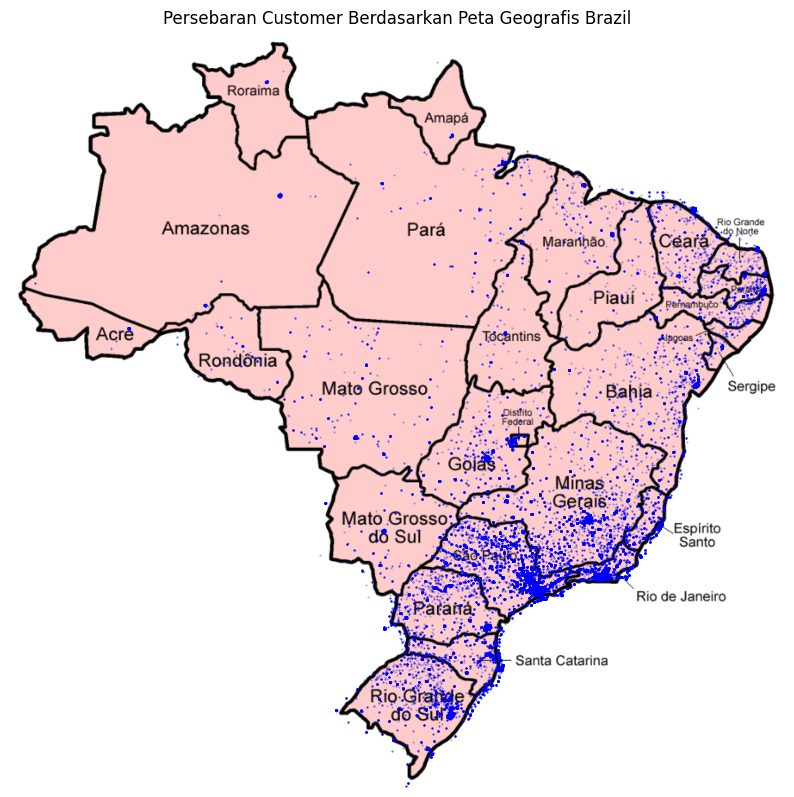

In [175]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

- Gambar di atas adalah latar peta Brazil yang saya plotting dengan scatter sehingga telihat persebaran lokasi costumer dari e-commerce.
- Sumber peta Brazil yang saya gunakan sebagai latar dari plotting: https://upload.wikimedia.org/wikipedia/commons/thumb/8/8b/Brazil_states_named.png/900px-Brazil_states_named.png?20051231181242

In [176]:
customers_silver.to_csv("./dashboard/geolocation.csv", index=False)

Saya simpan dataframe customers_silver ke dalam bentuk csv untuk digunakan pada dashboard streamlit.

In [177]:
data['customers'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_id, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_17144\1067633093.py:19: UserWarning: The palette list has more values (4119) than needed (10), which may not be intended.
  sns.barplot(x="jumlah", y="customer_city",


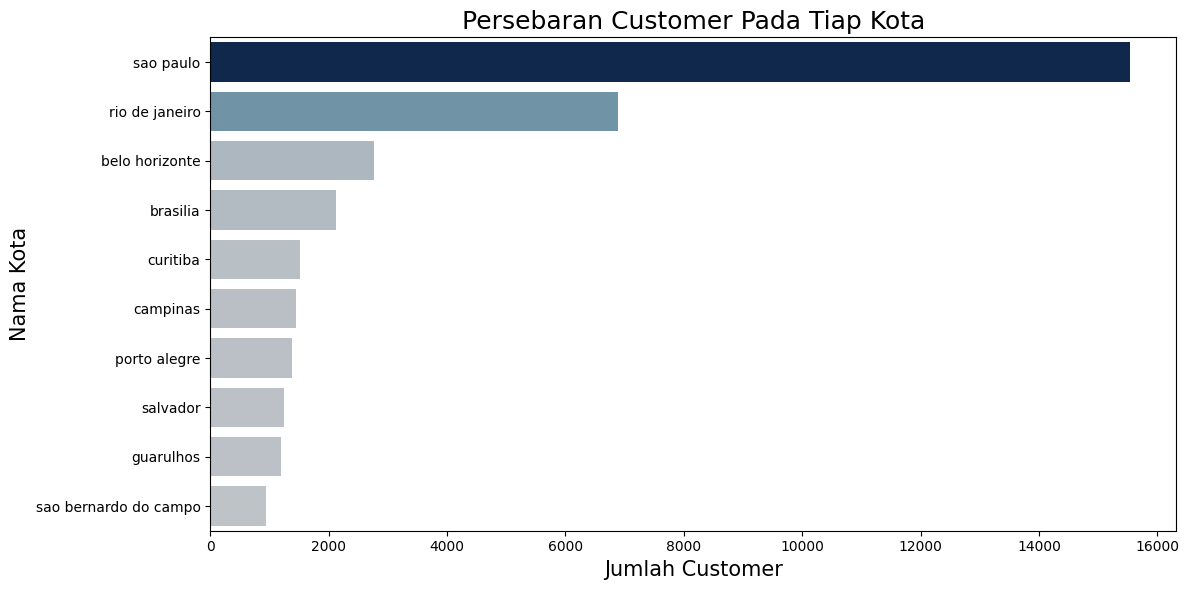

In [178]:
jumlah_customer = data['customers'].groupby("customer_city")["customer_id"].count().reset_index()

jumlah_customer = jumlah_customer.rename(columns={"customer_id": "jumlah"})

jumlah_customer = jumlah_customer.sort_values(by="jumlah", ascending=False)

# Mengatur ukuran figure plot
plt.figure(figsize=(12, 6))

# Menghitung warna berdasarkan jumlah customer
norm = plt.Normalize(jumlah_customer['jumlah'].min(), jumlah_customer['jumlah'].max())
cmap = plt.get_cmap('Blues')  # Mengambil colormap biru

# Mendapatkan warna berdasarkan jumlah customer
colors = cmap(norm(jumlah_customer['jumlah']))  # Mendapatkan warna
colors = (colors[:, :3]*0.8).tolist()  # Mengambil RGB dan mengonversi ke list

# Membuat bar plot menggunakan seaborn
sns.barplot(x="jumlah", y="customer_city", 
            data=jumlah_customer.head(10), palette=colors, hue='customer_city', legend=False)

# Membuat label sumbu x dan y
plt.gca().set_xlabel("Jumlah Customer", fontsize=15)
plt.gca().set_ylabel("Nama Kota", fontsize=15)

# Mengatur judul
plt.gca().set_title("Persebaran Customer Pada Tiap Kota", loc="center", fontsize=18)

plt.tight_layout()
plt.show()

Saya buat bar plot untuk melihat jumlah customer di setiap kota.

### **Insight:**
- Dari visualisasi data jumlah penjualan produk yang dilihat dari kategorinya, kategori produk yang paling banyak terjual adalah bed_bath_table dan produk yang paling sedikit terjual adalah security_and_services. Harga produk juga memiliki pengaruh terhadap banyaknya penjualan, karena kategori barang yang penjualannya paling banyak cenderung memiliki harga barang yang rendah. (ditunjukkan dengan warna pada dot scatter plot)
- Berdasarkan letak geografisnya, pembeli terbanyak berasal dari daerah Brazil Tenggara. Customer banyak berlokasi di kota-kota besar yaitu Sao Paulo, Rio de Janeiro dan Porto Alegre.
- Saya membuat bar diagram dengan menggunakan matplotlib.pyplot dan barplot dari seaborn.
- Isi dari bar diagram adalah total dari penjualan barang yang di group by kategori barang.
- Saya juga membuat scatter plot 3 variable, 2 variabel x dan y, dan ada variabel 1 lagi yang direpresentasikan dengan warna.
- Untuk distribusi lokasi customer dengan menggunakan peta, saya menggunakan fungsi plot_brazil_map(data), parameter data berisi kolom geolocation_lng dan geolocation_lat. Peta brazil diambil dari url. Lalu buat plot dengan variabel ax, hilangkan sumbu dengan axis('off'), kemudian tampilkan peta.

## Conclusion

- Dari visualisasi data jumlah penjualan produk yang dilihat dari kategorinya, kategori produk yang paling banyak terjual adalah bed_bath_table dan produk yang paling sedikit terjual adalah security_and_services. Harga produk juga memiliki pengaruh terhadap banyaknya penjualan, karena kategori barang yang penjualannya banyak cenderung memiliki harga barang yang rendah. (ditunjukkan dengan warna pada dot scatter plot)
- Berdasarkan letak geografisnya, pembeli terbanyak berasal dari daerah Brazil Tenggara. Customer banyak berlokasi di kota-kota besar yaitu Sao Paulo, Rio de Janeiro dan Porto Alegre.